In [1]:
from google.colab import drive


In [ ]:
drive.mount('/content/drive/')

In [ ]:
#importing Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/customer_data.csv")

In [ ]:
#EDA

In [ ]:
#data head
data.head(20)

In [ ]:
data.tail(10)

In [ ]:
data.shape

In [ ]:
data.size

In [ ]:
data.columns

In [ ]:
len(data.columns)

In [ ]:
data.info()

In [ ]:
data.describe()

In [ ]:
#unique values of each columns
objects_cols=['year', 'customer_id', 'phone_no', 'gender', 'age',
       'no_of_days_subscribed', 'multi_screen', 'mail_subscribed',
       'weekly_mins_watched', 'minimum_daily_mins', 'maximum_daily_mins',
       'weekly_max_night_mins', 'videos_watched', 'maximum_days_inactive',
       'customer_support_calls', 'churn']
for i in objects_cols:
  print("column name:{}".format(i))
  print("Number of unique columns of",i,":{}".format(data[i].nunique()))
  print("Values of Unique columns of ",i,"is below:\n{}".format(data[i].value_counts()))
  print("------------------------------------------------------------------------")

In [ ]:
data.isnull()

In [ ]:
data.isnull().sum()

data preprocessing


In [ ]:
#missing values
#Null values processed by filling the values
data["gender"].fillna("No Gender", inplace = True)
#Null values processed using MODE
mode = data['maximum_days_inactive'].mode().values[0]
data['maximum_days_inactive']= data['maximum_days_inactive'].replace(np.nan, mode)
#Null value processed by deleting the rows
data = data.dropna(axis = 0, how ='any')


In [ ]:
print(data.isnull().sum())
data.shape

In [ ]:
#Label encoding
from sklearn import preprocessing
print(data['gender'].unique())
print(data['mail_subscribed'].unique())
data['multi_screen'].unique()

In [ ]:
label_encoder = preprocessing.LabelEncoder()
data['gender']= label_encoder.fit_transform(data['gender'])
data['multi_screen']= label_encoder.fit_transform(data['multi_screen'])
data['mail_subscribed']= label_encoder.fit_transform(data['mail_subscribed'])
print(data['gender'].unique())
print(data['mail_subscribed'].unique())
data['multi_screen'].unique()

In [ ]:
#display encoded dataset
data.head(10)

In [ ]:
data.drop(['phone_no'],axis=1,inplace=True)

In [ ]:
#feature selection using anova
df=pd.DataFrame(data)

In [ ]:
X_temp = df.drop(labels=["churn"],axis=1) # Features
y_temp = df["churn"] # Target

In [ ]:
from sklearn.feature_selection import f_regression, SelectKBest
# Applying SelectKBest class to extract top 13 best features
fs = SelectKBest(score_func=f_regression,k=13)
# Applying feature selection
fit = fs.fit(X_temp,y_temp)

In [ ]:
features_score = pd.DataFrame(fit.scores_)
features = pd.DataFrame(X_temp.columns)
feature_score = pd.concat([features,features_score],axis=1)
# Assigning column names
feature_score.columns = ["Input_Features","F_Score"]
print(feature_score.nlargest(12,columns="F_Score"))

In [ ]:
xx = df['churn'].value_counts().reset_index()
import seaborn as sns
sns.barplot(x = "index", y = "churn" , data =xx, palette="cividis")

In [ ]:
#train_test_split
from sklearn.model_selection import train_test_split
X=df[['multi_screen', 'customer_support_calls', 'weekly_mins_watched', 'maximum_daily_mins', 'mail_subscribed', 'minimum_daily_mins', 'maximum_days_inactive']]
y=df['churn']
# using the train test split function
X_train, X_test,y_train, y_test = train_test_split(X,y ,random_state=42,test_size=0.2,shuffle=True)

In [ ]:
df.shape

In [ ]:
X_train.shape

In [ ]:
y_train.shape
#only target variable('churn')

In [ ]:
X_train.head()

In [ ]:
y_train.head()

In [ ]:
X_test.head()


In [ ]:
y_test.head()

In [ ]:
#Balance data
#using SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter

In [ ]:
counter=Counter(y_train)
print('Before',counter)
#oversampling the train dataset using smote
smt=SMOTE()
X_train_sm,y_train_sm=smt.fit_resample(X_train,y_train)

counter=Counter(y_train_sm)
print('After',counter)

Before Counter({0.0: 1359, 1.0: 213})
After Counter({0.0: 1359, 1.0: 1359})


*   use X_train_sm , y_train_sm for training the model
*   X_test, y_test for testing the model

##RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_RFC = RandomForestClassifier(n_estimators=70)
#n_estimators(=number of trees you want to build before taking the max votings)
#its value can be changed from 10 to 100, higher number of trees give better performance
model_RFC.fit(X_train_sm , y_train_sm)

RandomForestClassifier(n_estimators=70)

In [ ]:
##Accuracy
model_RFC.score(X_test,y_test)

0.8625954198473282

In [ ]:
#testing the model
y_predicted_RFC = model_RFC.predict(X_test)

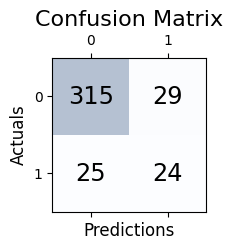

In [ ]:
##confusion matrix
from sklearn.metrics import confusion_matrix
cm_RFC = confusion_matrix(y_test, y_predicted_RFC)
##plotting the confusion matrix

fig, ax = plt.subplots(figsize=(2,2))
ax.matshow(cm_RFC, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm_RFC.shape[0]):
    for j in range(cm_RFC.shape[1]):
        ax.text(x=j, y=i,s=cm_RFC[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

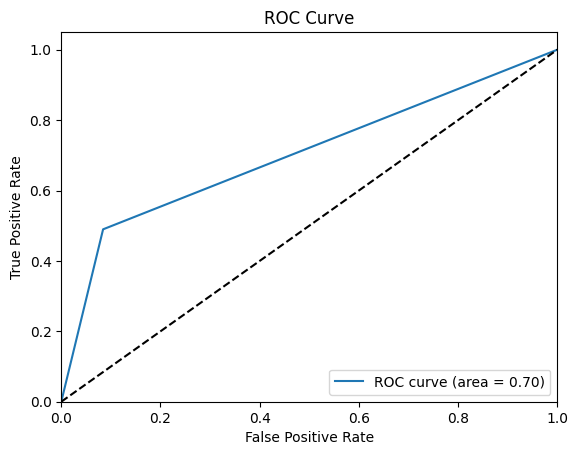

In [ ]:
from sklearn.metrics import roc_curve,auc
fpr1,tpr1,_=roc_curve(y_test,y_predicted_RFC)
roc_auc=auc(fpr1,tpr1)
plt.figure()
plt.plot(fpr1, tpr1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve
precision, recall, threshold = precision_recall_curve(y_test,y_predicted_RFC)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')

plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Train Precision-Recall curve")
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_predicted_RFC, color='blue', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#P-R curve
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot
rfc_probs = model_RFC.predict_proba(X_test)
# keep probabilities for the positive outcome only
rfc_probs = rfc_probs[:, 1]
rfc_precision, rfc_recall, _ = precision_recall_curve(y_test, rfc_probs)
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Baseline')
pyplot.plot(rfc_recall, rfc_precision, marker='.', label='Random Forest')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
print('Accuracy  :', accuracy_score(y_test, y_predicted_RFC))
print('F1 score  :', f1_score(y_test, y_predicted_RFC,average='weighted'))
print('Recall    :', recall_score(y_test, y_predicted_RFC,average='weighted'))
print('Precision :', precision_score(y_test, y_predicted_RFC,average='weighted'))

In [ ]:
##classification report
report = classification_report(y_test, y_predicted_RFC, output_dict=True)
df_classification_report_RFC = pd.DataFrame(report).transpose()
print('clasification report:\n')
df_classification_report_RFC

## XGBOOST CLASSIFIER

In [ ]:
#import libraries
from xgboost import XGBClassifier
#Create model instance
bst=XGBClassifier(n_estimators=70,learning_rate=1,objective='binary:logistic')
#fit the model
bst.fit(X_train_sm,y_train_sm)

In [ ]:
#Accuracy
bst.score(X_test,y_test)

In [ ]:
#testing the model
y_predicted_XGB=bst.predict(X_test)

In [ ]:
##confusion matrix
cm_XGB = confusion_matrix(y_test, y_predicted_XGB)
##plotting the confusion matrix

fig, ax = plt.subplots(figsize=(2,2))
ax.matshow(cm_XGB, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm_XGB.shape[0]):
    for j in range(cm_XGB.shape[1]):
        ax.text(x=j, y=i,s=cm_XGB[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_predicted_XGB, color='blue', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

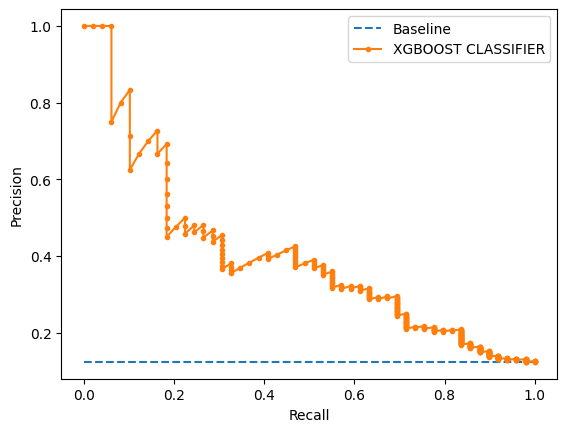

In [ ]:
#P-R curve
XGB_probs = bst.predict_proba(X_test)
# keep probabilities for the positive outcome only
XGB_probs = XGB_probs[:, 1]
XGB_precision, XGB_recall, _ = precision_recall_curve(y_test, XGB_probs)
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Baseline')
pyplot.plot(XGB_recall, XGB_precision, marker='.', label='XGBOOST CLASSIFIER')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
print('Accuracy  :', accuracy_score(y_test, y_predicted_XGB))
print('F1 score  :', f1_score(y_test, y_predicted_XGB,average='weighted'))
print('Recall    :', recall_score(y_test, y_predicted_XGB,average='weighted'))
print('Precision :', precision_score(y_test, y_predicted_XGB,average='weighted'))


Accuracy  : 0.8447837150127226
F1 score  : 0.8502828233435176
Recall    : 0.8447837150127226
Precision : 0.856825768498911


In [ ]:
##classification report
report = classification_report(y_test, y_predicted_XGB, output_dict=True)
df_classification_report_XGB= pd.DataFrame(report).transpose()
print('clasification report:\n')
df_classification_report_XGB

clasification report:



,precision,recall,f1-score,support
0.0,0.922388,0.898256,0.910162,344.000000
1.0,0.396552,0.469388,0.429907,49.000000
accuracy,0.844784,0.844784,0.844784,0.844784
macro avg,0.659470,0.683822,0.670034,393.000000
weighted avg,0.856826,0.844784,0.850283,393.000000


## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#chose neighbours to be equal to 3
knn = KNeighborsClassifier(n_neighbors=3)
#fitting the model
knn.fit(X_train_sm, y_train_sm)
# Calculate the accuracy of the model
print(knn.score(X_test,y_test))

0.6870229007633588


In [ ]:
#testing the model
y_predicted_knn = knn.predict(X_test)

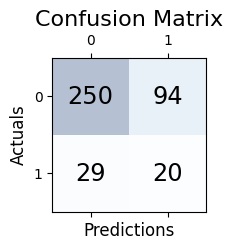

In [ ]:
##confusion matrix
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_test, y_predicted_knn)
##plotting the confusion matrix

fig, ax = plt.subplots(figsize=(2,2))
ax.matshow(cm_knn, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm_knn.shape[0]):
    for j in range(cm_knn.shape[1]):
        ax.text(x=j, y=i,s=cm_knn[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

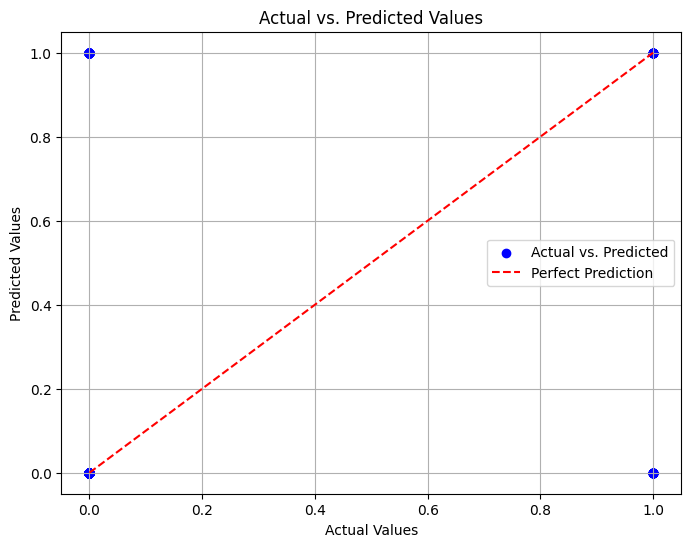

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_predicted_knn, color='blue', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

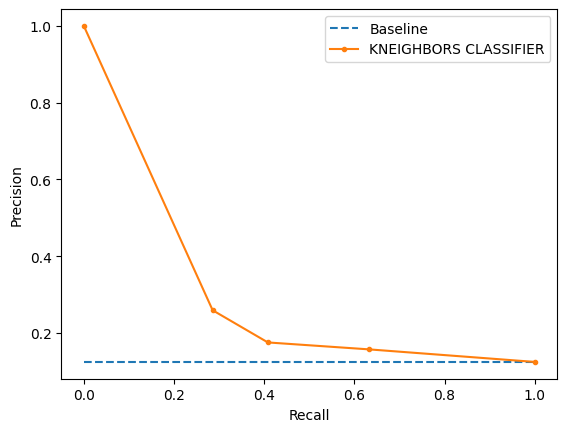

In [ ]:
#P-R curve
knn_probs = knn.predict_proba(X_test)
# keep probabilities for the positive outcome only
knn_probs = knn_probs[:, 1]
knn_precision, knn_recall, _ = precision_recall_curve(y_test, knn_probs)
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Baseline')
pyplot.plot(knn_recall, knn_precision, marker='.', label='KNEIGHBORS CLASSIFIER')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
print('Accuracy  :', accuracy_score(y_test, y_predicted_knn))
print('F1 score  :', f1_score(y_test, y_predicted_knn,average='weighted'))
print('Recall    :', recall_score(y_test, y_predicted_knn,average='weighted'))
print('Precision :', precision_score(y_test, y_predicted_knn,average='weighted'))

Accuracy  : 0.6870229007633588
F1 score  : 0.7330992543816887
Recall    : 0.6870229007633588
Precision : 0.806209208210271


In [ ]:
##classification report
report = classification_report(y_test, y_predicted_knn, output_dict=True)
df_classification_report_knn = pd.DataFrame(report).transpose()
print('clasification report:\n')
df_classification_report_knn

clasification report:



,precision,recall,f1-score,support
0.0,0.896057,0.726744,0.802568,344.000000
1.0,0.175439,0.408163,0.245399,49.000000
accuracy,0.687023,0.687023,0.687023,0.687023
macro avg,0.535748,0.567454,0.523983,393.000000
weighted avg,0.806209,0.687023,0.733099,393.000000


## SVM

In [ ]:
from sklearn import svm
#Create model instance
clf = svm.SVC(kernel='linear',probability=True)
#fit the model
clf.fit(X_train_sm, y_train_sm)

In [ ]:
#Accuracy
clf.score(X_test,y_test)

In [ ]:
#testing the model
y_predicted_svm = clf.predict(X_test)

In [ ]:
##confusion matrix
from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(y_test, y_predicted_svm)
##plotting the confusion matrix

fig, ax = plt.subplots(figsize=(2,2))
ax.matshow(cm_svm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm_svm.shape[0]):
    for j in range(cm_svm.shape[1]):
        ax.text(x=j, y=i,s=cm_svm[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_predicted_svm, color='blue', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#P-R curve
clf_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
clf_probs = clf_probs[:, 1]
clf_precision, clf_recall, _ = precision_recall_curve(y_test, clf_probs)
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Baseline')
pyplot.plot(clf_recall, clf_precision, marker='.', label='SVM')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
print('Accuracy  :', accuracy_score(y_test, y_predicted_svm))
print('F1 score  :', f1_score(y_test, y_predicted_svm,average='weighted'))
print('Recall    :', recall_score(y_test, y_predicted_svm,average='weighted'))
print('Precision :', precision_score(y_test, y_predicted_svm,average='weighted'))

In [ ]:
##classification report
report = classification_report(y_test, y_predicted_svm, output_dict=True)
df_classification_report_svm=pd.DataFrame(report).transpose()
print('clasification report:\n')
df_classification_report_svm